In [137]:
# Importing necessary packages 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import training and testing data files 

training_df = pd.read_csv('D:/Study/3rd Sem/ECEN 689/Challenge 5 - SVM/5challenge_training_kishan3111.csv')
testing_df = pd.read_csv('D:/Study/3rd Sem/ECEN 689/Challenge 5 - SVM/5challenge_testing_kishan3111.csv')

print(training_df.head())

   Unnamed: 0  Class  Feature 0  Feature 1
0           0      1   0.795896  -0.694803
1           1      1   1.134581  -0.004151
2           2      0  -0.436687  -0.706914
3           3      1   1.178069   0.530941
4           4      1  -0.620545  -0.912903


In [152]:
X1 = training_df[['Feature 0', 'Feature 1']].values
Y1 = training_df['Class'].values
X2 = testing_df[['Feature 0', 'Feature 1']].values

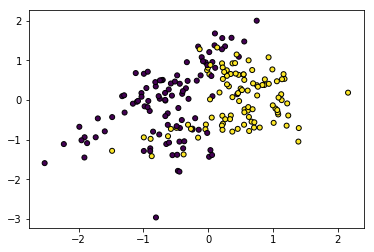

In [139]:
# Plotting the training data set

plt.scatter(X1[:, 0], X1[:, 1], marker='o',c=Y1,
            s=25, edgecolor='k')
plt.show()

In [140]:
# Defining ranges of C and Gamma to identify the optimum value

C_range=np.linspace(0.001,10,10,endpoint=True)
gamma_range=np.linspace(0.001,10,10,endpoint=True)

In [141]:
# Defining various types of classifier for CV

from sklearn.model_selection import GridSearchCV
parameters = [{'C': C_range, 'gamma':gamma_range}]
linear_classifier = SVC(kernel = 'linear', random_state = 0)
poly_classifier = SVC(kernel = 'poly', random_state = 0)
rbf_classifier = SVC(kernel = 'rbf', random_state = 0)
sig_classifier = SVC(kernel = 'sigmoid', random_state = 0)

In [142]:
# Optimizing C and Gamma for Linear Kernel

grid_search = GridSearchCV(estimator = linear_classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X1, Y1)
linear_best_accuracy = grid_search.best_score_
print(linear_best_accuracy)
linear_best_parameters = grid_search.best_params_
print(linear_best_parameters)

0.845
{'C': 3.334, 'gamma': 0.001}


In [153]:
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = X[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55, label='test set')

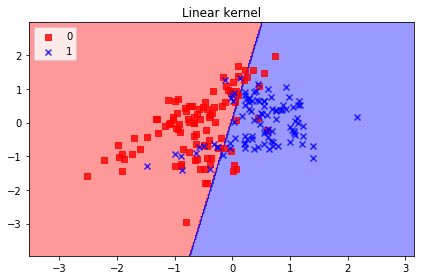

In [155]:
#Visualization plot for linear kernel

plot_decision_regions(X1, Y1, classifier=svm.SVC(kernel='linear',C= 3.334, gamma = 0.001).fit(X1,Y1))
plt.legend(loc='upper left')
plt.title("Linear kernel")
plt.tight_layout()
plt.show()

In [127]:
# Optimizing C and Gamma for Polynomial Kernel

grid_search = GridSearchCV(estimator = poly_classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X1, Y1)
poly_best_accuracy = grid_search.best_score_
print(poly_best_accuracy)
poly_best_parameters = grid_search.best_params_
print(poly_best_parameters)

0.82
{'C': 5.556, 'gamma': 1.1119999999999999}


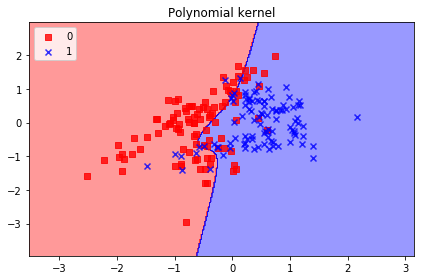

In [156]:
#Visualization plot for polynomial kernel

plot_decision_regions(X1, Y1, classifier=svm.SVC(kernel='poly',C= 5.556, gamma = 1.11199).fit(X1,Y1))
plt.legend(loc='upper left')
plt.title("Polynomial kernel")
plt.tight_layout()
plt.show()

In [128]:
# Optimizing C and Gamma for Radial Kernel

grid_search = GridSearchCV(estimator = rbf_classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X1, Y1)
rbf_best_accuracy = grid_search.best_score_
print(rbf_best_accuracy)
rbf_best_parameters = grid_search.best_params_
print(rbf_best_parameters)

0.86
{'C': 1.1119999999999999, 'gamma': 1.1119999999999999}


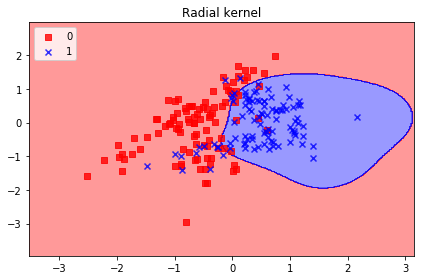

In [157]:
#Visualization plot for radial kernel

plot_decision_regions(X1, Y1, classifier=svm.SVC(kernel='rbf',C= 1.111999, gamma = 1.111999).fit(X1,Y1))
plt.legend(loc='upper left')
plt.title("Radial kernel")
plt.tight_layout()
plt.show()

In [129]:
# Optimizing C and Gamma for Sigmoid Kernel

grid_search = GridSearchCV(estimator = sig_classifier, param_grid = parameters, scoring = 'accuracy', cv = 10)
grid_search = grid_search.fit(X1, Y1)
sig_best_accuracy = grid_search.best_score_
print(sig_best_accuracy)
sig_best_parameters = grid_search.best_params_
print(sig_best_parameters)

0.825
{'C': 5.556, 'gamma': 0.001}


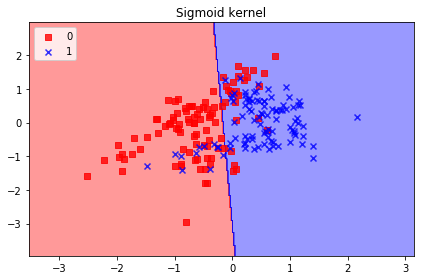

In [158]:
#Visualization plot for sigmoid kernel

plot_decision_regions(X1, Y1, classifier=svm.SVC(kernel='sigmoid',C= 5.556, gamma = 0.001).fit(X1,Y1))
plt.legend(loc='upper left')
plt.title("Sigmoid kernel")
plt.tight_layout()
plt.show()

In [160]:
# Considering the model which gave the highest accuracy

clf = svm.SVC(kernel = 'rbf',C = 1.1119,gamma = 1.1119)
clf.fit(X1,Y1)

SVC(C=1.1119, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.1119, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [162]:
# Prediction of class of testing file

Y_Test=clf.predict(X2)
testing_df.Class=Y_Test
testing_df.head(10)

,Unnamed: 0,Class,Feature 0,Feature 1
0,0,0,-0.802374,-1.544252
1,1,0,-1.608724,-0.556792
2,2,1,0.801265,0.134001
3,3,0,1.836459,2.556268
4,4,1,-0.167301,-0.424491
5,5,0,-0.542202,0.384983
6,6,0,-0.513502,-1.022095
7,7,0,-0.941223,-1.440907
8,8,0,-0.392974,-0.421666
9,9,1,0.230076,0.420403


In [165]:
testing_df.to_csv("D:/Study/3rd Sem/ECEN 689/Challenge 5 - SVM/5challenge_testing_kishan3111.csv",index=False)